![logo](images/untumbes.PNG)

<center><b>Prof. Dr. Jorge Zavaleta - zavaleta.jorge@gmail.com</b></center>

>## Algoritmos de Agrupamientos (Clustering)


In [1]:
# librarys
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
# sklearn
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
# graphics
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
# warnings
import warnings
warnings.filterwarnings("ignore")

>## Leitura de datos

In [2]:
# paths
path_dataset ='data/'    # diretorio do dataset local
# dataset read
file_name='curados_obitos_final.csv'          # nome do dataset
covid19 = pd.read_csv(path_dataset+file_name,sep=';',encoding='utf-8',low_memory=False) #index_col=0  #encoding='ISO-8859-1','latin-1')     # leitura do dataset
covid19.head()

,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI,EVOLUCAO
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,82,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [3]:
#data x
covid19.columns.name='SINTO'
covid19.head()

SINTO,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI,EVOLUCAO
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,82,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [4]:
dX = covid19.copy()
dX.head()

SINTO,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI,EVOLUCAO
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,82,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [5]:
dX.shape

(32970, 17)

In [6]:
dY = covid19.T
dY.head()

,0,1,2,3,4,5,6,7,8,9,...,32960,32961,32962,32963,32964,32965,32966,32967,32968,32969
SINTO,,,,,,,,,,,,,,,,,,,,,
NU_IDADE_N,1.0,82.0,2.0,1.0,3.0,9.0,1.0,10.0,2.0,45.0,...,4.0,28.0,47.0,70.0,90.0,69.0,79.0,88.0,91.0,50.0
FEBRE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
TOSSE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
DISPNEIA,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
DESC_RESP,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [7]:
dY.shape

(17, 32970)

In [8]:
#cria matriz cuadrada
ncols = dX.shape[1]
data_dist = pd.DataFrame(np.zeros((ncols,ncols)))
nc = dX.keys()
data_dist.columns = list(nc)
data_dist.index = list(nc)
data_dist.head()

,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI,EVOLUCAO
NU_IDADE_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FEBRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOSSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DISPNEIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DESC_RESP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# calcular distancia euclideana
def dist_euclidean(X,Y, dXY):
    nidx = X.shape[0]
    ncols = X.shape[1]
    name_cols = list(X.keys())
    for i in range(0,ncols-1):
        coluna = name_cols[i]
        for j in range(0,ncols-1):
            fila = name_cols[j]
            s = 0
            for i in range(0,nidx-1):
                vx = dX.loc[i,coluna]
                vy = dY.loc[fila,i]
                p = (vx-vy)*(vx-vy)
                s = s+p
            r = round(np.sqrt(s),2)
            dXY.loc[fila,coluna] = r     
    #
    return dXY

In [10]:
diste = dist_euclidean(dX,dY,data_dist)
diste.head(10)

,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI,EVOLUCAO
NU_IDADE_N,0.00,10180.19,10139.59,10120.81,10127.92,10125.92,10234.39,10213.89,10208.14,10135.62,10151.20,10239.58,10210.46,10134.06,10116.54,10171.98,0.0
FEBRE,10180.19,0.00,106.49,120.51,118.47,122.51,133.38,135.38,133.30,140.35,146.58,136.81,140.26,114.49,139.86,141.15,0.0
TOSSE,10139.59,106.49,0.00,92.56,92.92,100.04,155.87,151.06,146.23,131.57,138.94,158.73,156.02,92.27,126.49,141.26,0.0
DISPNEIA,10120.81,120.51,92.56,0.00,73.55,77.71,160.42,150.90,150.59,118.07,128.82,161.96,154.54,95.71,113.37,132.11,0.0
DESC_RESP,10127.92,118.47,92.92,73.55,0.00,75.24,158.25,149.12,148.92,122.06,130.79,160.57,154.55,94.36,118.74,131.95,0.0
SATURACAO,10125.92,122.51,100.04,77.71,75.24,0.00,155.58,146.79,145.63,115.37,123.99,156.85,149.67,101.84,112.62,127.81,0.0
VOMITO,10234.39,133.38,155.87,160.42,158.25,155.58,0.00,86.37,98.33,135.62,122.81,64.90,84.23,159.01,144.31,120.51,0.0
FADIGA,10213.89,135.38,151.06,150.90,149.12,146.79,86.37,0.00,108.23,126.38,117.72,80.66,89.92,156.52,134.54,119.97,0.0
OUTRO_SIN,10208.14,133.30,146.23,150.59,148.92,145.63,98.33,108.23,0.00,128.70,124.87,96.65,104.01,145.27,137.85,121.70,0.0
FATOR_RISC,10135.62,140.35,131.57,118.07,122.06,115.37,135.62,126.38,128.70,0.00,106.64,128.87,115.68,142.69,96.78,114.85,0.0


In [11]:
diste.head(10)

,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI,EVOLUCAO
NU_IDADE_N,0.00,10180.19,10139.59,10120.81,10127.92,10125.92,10234.39,10213.89,10208.14,10135.62,10151.20,10239.58,10210.46,10134.06,10116.54,10171.98,0.0
FEBRE,10180.19,0.00,106.49,120.51,118.47,122.51,133.38,135.38,133.30,140.35,146.58,136.81,140.26,114.49,139.86,141.15,0.0
TOSSE,10139.59,106.49,0.00,92.56,92.92,100.04,155.87,151.06,146.23,131.57,138.94,158.73,156.02,92.27,126.49,141.26,0.0
DISPNEIA,10120.81,120.51,92.56,0.00,73.55,77.71,160.42,150.90,150.59,118.07,128.82,161.96,154.54,95.71,113.37,132.11,0.0
DESC_RESP,10127.92,118.47,92.92,73.55,0.00,75.24,158.25,149.12,148.92,122.06,130.79,160.57,154.55,94.36,118.74,131.95,0.0
SATURACAO,10125.92,122.51,100.04,77.71,75.24,0.00,155.58,146.79,145.63,115.37,123.99,156.85,149.67,101.84,112.62,127.81,0.0
VOMITO,10234.39,133.38,155.87,160.42,158.25,155.58,0.00,86.37,98.33,135.62,122.81,64.90,84.23,159.01,144.31,120.51,0.0
FADIGA,10213.89,135.38,151.06,150.90,149.12,146.79,86.37,0.00,108.23,126.38,117.72,80.66,89.92,156.52,134.54,119.97,0.0
OUTRO_SIN,10208.14,133.30,146.23,150.59,148.92,145.63,98.33,108.23,0.00,128.70,124.87,96.65,104.01,145.27,137.85,121.70,0.0
FATOR_RISC,10135.62,140.35,131.57,118.07,122.06,115.37,135.62,126.38,128.70,0.00,106.64,128.87,115.68,142.69,96.78,114.85,0.0


In [12]:
# Index and columns names
diste.columns.name='SINTO'
diste.index.name = 'SINTO'
diste.head()

SINTO,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI,EVOLUCAO
SINTO,,,,,,,,,,,,,,,,,
NU_IDADE_N,0.00,10180.19,10139.59,10120.81,10127.92,10125.92,10234.39,10213.89,10208.14,10135.62,10151.20,10239.58,10210.46,10134.06,10116.54,10171.98,0.0
FEBRE,10180.19,0.00,106.49,120.51,118.47,122.51,133.38,135.38,133.30,140.35,146.58,136.81,140.26,114.49,139.86,141.15,0.0
TOSSE,10139.59,106.49,0.00,92.56,92.92,100.04,155.87,151.06,146.23,131.57,138.94,158.73,156.02,92.27,126.49,141.26,0.0
DISPNEIA,10120.81,120.51,92.56,0.00,73.55,77.71,160.42,150.90,150.59,118.07,128.82,161.96,154.54,95.71,113.37,132.11,0.0
DESC_RESP,10127.92,118.47,92.92,73.55,0.00,75.24,158.25,149.12,148.92,122.06,130.79,160.57,154.55,94.36,118.74,131.95,0.0


In [13]:
#normalizando
# scikit-learn uses population standard deviation
data_norm = diste.apply(preprocessing.scale, axis=0)
data_norm.head()

SINTO,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI,EVOLUCAO
SINTO,,,,,,,,,,,,,,,,,
NU_IDADE_N,-2.738412,3.999334,3.999212,3.999182,3.999189,3.999246,3.999136,3.999249,3.999302,3.999394,3.999392,3.999095,3.999208,3.999169,3.999363,3.999395,0.0
FEBRE,0.369040,-0.298230,-0.252245,-0.244715,-0.245549,-0.243366,-0.240646,-0.239111,-0.240946,-0.236138,-0.233474,-0.238998,-0.236663,-0.249979,-0.236961,-0.236472,0.0
TOSSE,0.356647,-0.253275,-0.297369,-0.256576,-0.256384,-0.252895,-0.231207,-0.232517,-0.235505,-0.239859,-0.236706,-0.229803,-0.230034,-0.259402,-0.242638,-0.236425,0.0
DISPNEIA,0.350915,-0.247356,-0.258147,-0.295856,-0.264598,-0.262366,-0.229297,-0.232584,-0.233670,-0.245579,-0.240988,-0.228448,-0.230657,-0.257943,-0.248209,-0.240289,0.0
DESC_RESP,0.353085,-0.248218,-0.257995,-0.264643,-0.295789,-0.263414,-0.230208,-0.233332,-0.234372,-0.243888,-0.240155,-0.229031,-0.230653,-0.258516,-0.245929,-0.240357,0.0


In [14]:
# pandas uses sample standard deviation
data_norm = (diste - diste.mean())/diste.std()
data_norm.head()

SINTO,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI,EVOLUCAO
SINTO,,,,,,,,,,,,,,,,,
NU_IDADE_N,-2.656650,3.879924,3.879805,3.879776,3.879783,3.879838,3.879732,3.879841,3.879892,3.879982,3.879981,3.879692,3.879802,3.879764,3.879952,3.879984,NaN
FEBRE,0.358022,-0.289325,-0.244713,-0.237408,-0.238217,-0.236099,-0.233461,-0.231971,-0.233752,-0.229087,-0.226503,-0.231862,-0.229597,-0.242515,-0.229886,-0.229411,NaN
TOSSE,0.345999,-0.245713,-0.288490,-0.248915,-0.248729,-0.245345,-0.224303,-0.225574,-0.228473,-0.232697,-0.229639,-0.222941,-0.223166,-0.251657,-0.235394,-0.229366,NaN
DISPNEIA,0.340437,-0.239971,-0.250440,-0.287023,-0.256698,-0.254532,-0.222450,-0.225640,-0.226693,-0.238247,-0.233793,-0.221627,-0.223770,-0.250242,-0.240798,-0.233115,NaN
DESC_RESP,0.342543,-0.240806,-0.250292,-0.256742,-0.286957,-0.255549,-0.223334,-0.226366,-0.227375,-0.236607,-0.232984,-0.222192,-0.223766,-0.250797,-0.238586,-0.233180,NaN


In [17]:
d_norm = data_norm.drop('EVOLUCAO',axis=1)
d_norm = d_norm.drop('EVOLUCAO',axis=0)
d_norm.head()

SINTO,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI
SINTO,,,,,,,,,,,,,,,,
NU_IDADE_N,-2.656650,3.879924,3.879805,3.879776,3.879783,3.879838,3.879732,3.879841,3.879892,3.879982,3.879981,3.879692,3.879802,3.879764,3.879952,3.879984
FEBRE,0.358022,-0.289325,-0.244713,-0.237408,-0.238217,-0.236099,-0.233461,-0.231971,-0.233752,-0.229087,-0.226503,-0.231862,-0.229597,-0.242515,-0.229886,-0.229411
TOSSE,0.345999,-0.245713,-0.288490,-0.248915,-0.248729,-0.245345,-0.224303,-0.225574,-0.228473,-0.232697,-0.229639,-0.222941,-0.223166,-0.251657,-0.235394,-0.229366
DISPNEIA,0.340437,-0.239971,-0.250440,-0.287023,-0.256698,-0.254532,-0.222450,-0.225640,-0.226693,-0.238247,-0.233793,-0.221627,-0.223770,-0.250242,-0.240798,-0.233115
DESC_RESP,0.342543,-0.240806,-0.250292,-0.256742,-0.286957,-0.255549,-0.223334,-0.226366,-0.227375,-0.236607,-0.232984,-0.222192,-0.223766,-0.250797,-0.238586,-0.233180


In [18]:
d_norm.shape

(16, 16)

In [19]:
#data_norm[['FEBRE','TOSSE']]
d1_norm = pairwise.pairwise_distances(d_norm[['FEBRE','TOSSE','DISPNEIA','DESC_RESP']], metric='euclidean')
dx_norm = pd.DataFrame(d1_norm, columns=d_norm.index, index=d_norm.index)
dx_norm

SINTO,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI
SINTO,,,,,,,,,,,,,,,,
NU_IDADE_N,1.192093e-07,8.264589,8.275643e+00,8.276784,8.277115,8.258429e+00,8.210623,8.215035,8.216560,8.230347,8.223547e+00,8.208538,8.211150,8.254021,8.233142,8.223265e+00
FEBRE,8.264589e+00,0.000000,6.372904e-02,0.072607,0.071656,5.613571e-02,0.062720,0.061035,0.059645,0.058424,6.179877e-02,0.064744,0.064272,0.049350,0.057941,5.999632e-02
TOSSE,8.275643e+00,0.063729,1.053671e-08,0.054740,0.054826,4.271585e-02,0.075697,0.071469,0.069540,0.058067,6.322598e-02,0.077480,0.074827,0.038099,0.055470,6.400530e-02
DISPNEIA,8.276784e+00,0.072607,5.474034e-02,0.000000,0.042817,3.215906e-02,0.079256,0.073768,0.072935,0.055538,6.200727e-02,0.080700,0.076842,0.040399,0.052741,6.330761e-02
DESC_RESP,8.277115e+00,0.071656,5.482576e-02,0.042817,0.000000,3.118372e-02,0.078898,0.073465,0.072642,0.056484,6.247865e-02,0.080481,0.076858,0.039913,0.054059,6.331971e-02
SATURACAO,8.258429e+00,0.056136,4.271585e-02,0.032159,0.031184,7.450581e-09,0.053595,0.047953,0.046896,0.029471,3.630400e-02,0.055244,0.051455,0.011738,0.026543,3.730114e-02
VOMITO,8.210623e+00,0.062720,7.569719e-02,0.079256,0.078898,5.359512e-02,0.000000,0.005835,0.006842,0.025172,1.935333e-02,0.002161,0.004015,0.046304,0.028149,1.729514e-02
FADIGA,8.215035e+00,0.061035,7.146911e-02,0.073768,0.073465,4.795340e-02,0.005835,0.000000,0.002166,0.019364,1.361507e-02,0.007294,0.003923,0.041002,0.022368,1.146990e-02
OUTRO_SIN,8.216560e+00,0.059645,6.954010e-02,0.072935,0.072642,4.689623e-02,0.006842,0.002166,0.000000,0.018602,1.321093e-02,0.008565,0.005686,0.039570,0.021495,1.100637e-02


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [50.0, 50.0, 72.5, 72.5],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [61.25, 61.25, 110.0, 110.0],
  [30.0, 30.0, 85.625, 85.625],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [57.8125, 57.8125, 142.5, 142.5],
  [15.0, 15.0, 100.15625, 100.15625],
  [5.0, 5.0, 57.578125, 57.578125]],
 'dcoord': [[0.0, 0.029589960810896578, 0.029589960810896578, 0.0],
  [0.0, 0.005418201719116054, 0.005418201719116054, 0.0],
  [0.0, 0.006590285645330759, 0.006590285645330759, 0.0],
  [0.0, 0.009719200207353635, 0.009719200207353635, 0.006590285645330759],
  [0.005418201719116054,
   0.013207996630758116,
   0.013207996630758116,
   0.009719200207353635],
  [0.0, 0.006863061188694329, 0.006863061188694329, 0.0],
  [0.0, 0.0113308613451582, 0.0113308613451582, 0.0],
  [0.006863061188694329,
   0.024383513070163

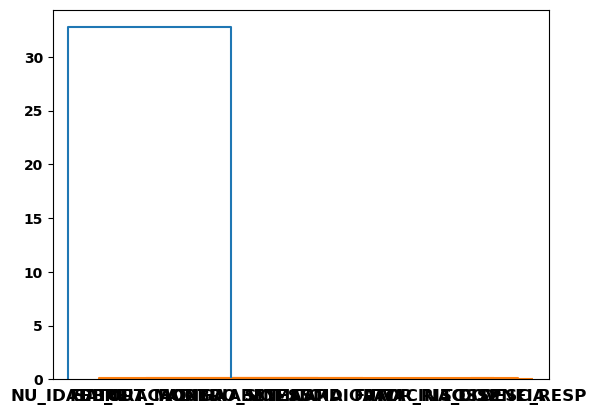

In [20]:
# linkage single
Z = linkage(dx_norm, method='single')
dendrogram(Z, labels=dx_norm.index, color_threshold=2.75)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [31.25, 31.25, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [110.0, 110.0, 133.75, 133.75],
  [55.625, 55.625, 121.875, 121.875],
  [5.0, 5.0, 88.75, 88.75]],
 'dcoord': [[0.0, 0.005418201719116054, 0.005418201719116054, 0.0],
  [0.0, 0.006590285645330759, 0.006590285645330759, 0.0],
  [0.0, 0.011861596678432881, 0.011861596678432881, 0.006590285645330759],
  [0.005418201719116054,
   0.0215859640441745,
   0.0215859640441745,
   0.011861596678432881],
  [0.0, 0.006863061188694329, 0.006863061188694329, 0.0],
  [0.0, 0.0113308613451582, 0.0113308613451582, 0.0],
  [0.006863061188694329,
   0.03160676543692655,
   0.03160676543692655,
   0.0113308613451582],
  [0.0215859640441745,
   0.

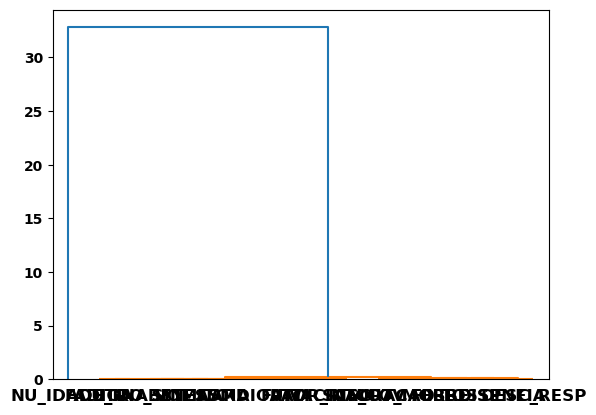

In [21]:
# dendogram
Z = linkage(dx_norm, method='average')
dendrogram(Z, labels=dx_norm.index, color_threshold=3.6)

In [22]:
# linkage simples
memb = fcluster(linkage(dx_norm, method='single'), 6, criterion='maxclust')
memb = pd.Series(memb, index=dx_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  SATURACAO, OUT_MORBI
2 :  VOMITO, FADIGA, OUTRO_SIN, FATOR_RISC, CARDIOPATI, ASMA, DIABETES, VACINA_COV, UTI
3 :  DISPNEIA, DESC_RESP
4 :  TOSSE
5 :  FEBRE
6 :  NU_IDADE_N


In [23]:
# linkage average
memb = fcluster(linkage(dx_norm, method='average'), 6, criterion='maxclust')
memb = pd.Series(memb, index=dx_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  VOMITO, FADIGA, OUTRO_SIN, FATOR_RISC, CARDIOPATI, ASMA, DIABETES, VACINA_COV, UTI
2 :  SATURACAO, OUT_MORBI
3 :  DISPNEIA, DESC_RESP
4 :  TOSSE
5 :  FEBRE
6 :  NU_IDADE_N


In [24]:
# set labels as cluster membership and utility name
dx_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, dx_norm.index)]
#

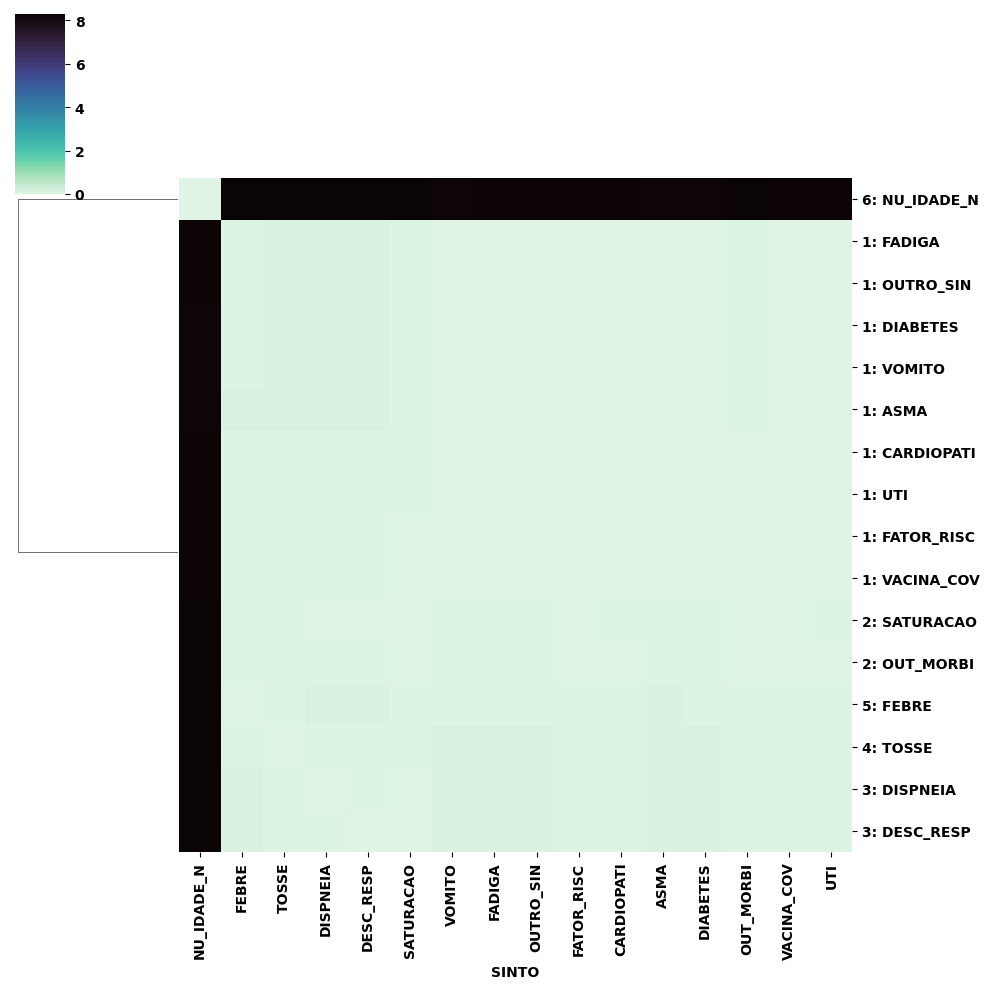

In [25]:
# plot heatmap
# the '_r' suffix reverses the color mapping to large = dark
sns.clustermap(dx_norm, method='average', col_cluster=False, cmap='mako_r');

In [26]:
# kmeans k= 6 cluster
kmedias = KMeans(n_clusters=6, random_state=0).fit(dx_norm)
# Cluster membership
memb = pd.Series(kmedias.labels_, index=dx_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  1: VOMITO, 1: FADIGA, 1: OUTRO_SIN, 1: ASMA, 1: DIABETES
1 :  6: NU_IDADE_N
2 :  4: TOSSE, 3: DISPNEIA, 3: DESC_RESP
3 :  2: SATURACAO, 2: OUT_MORBI
4 :  1: FATOR_RISC, 1: CARDIOPATI, 1: VACINA_COV, 1: UTI
5 :  5: FEBRE


In [35]:
#centroids
centroides = pd.DataFrame(kmedias.cluster_centers_, columns=dx_norm.columns)
#pd.options.display.max_rows = 5
centroides.head(5)

SINTO,NU_IDADE_N,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,VOMITO,FADIGA,OUTRO_SIN,FATOR_RISC,CARDIOPATI,ASMA,DIABETES,OUT_MORBI,VACINA_COV,UTI
0,8.212381e+00,0.062483,0.073803,0.076700,0.076469,0.051029,0.003771,0.003844,0.004652,0.022430,0.016575,0.004469,0.003590,0.043940,0.025420,0.014555
1,1.192093e-07,8.264589,8.275643,8.276784,8.277115,8.258429,8.210623,8.215035,8.216560,8.230347,8.223547,8.208538,8.211150,8.254021,8.233142,8.223265
2,8.276514e+00,0.069331,0.036522,0.032519,0.032548,0.035353,0.077950,0.072901,0.071706,0.056696,0.062571,0.079553,0.076176,0.039470,0.054090,0.063544
3,8.256225e+00,0.052743,0.040408,0.036279,0.035548,0.005869,0.049950,0.044478,0.043233,0.026858,0.033573,0.051684,0.048077,0.005869,0.023988,0.034371
4,8.227575e+00,0.059540,0.060192,0.058398,0.059085,0.032405,0.022492,0.016704,0.016079,0.004556,0.004924,0.023777,0.019672,0.026990,0.006085,0.005542


In [36]:
#Within-cluster sum of squared distances and cluster count
# calculate the distances of each data point to the cluster centers
distances = kmedias.transform(dx_norm)
distances

array([[3.28268634e+01, 0.00000000e+00, 3.27491109e+01, 3.28258109e+01,
        3.28475309e+01, 3.27451725e+01],
       [1.74285369e-01, 3.27451725e+01, 1.01318517e-01, 1.23200669e-01,
        1.65197841e-01, 1.68587394e-07],
       [2.04111098e-01, 3.27481497e+01, 4.93412040e-02, 1.11474271e-01,
        1.81509816e-01, 9.91324576e-02],
       [2.11442739e-01, 3.27494988e+01, 3.90638911e-02, 1.08805163e-01,
        1.84574314e-01, 1.15459657e-01],
       [2.11578178e-01, 3.27497679e+01, 3.90804603e-02, 1.08464109e-01,
        1.85119609e-01, 1.14568642e-01],
       [1.51136052e-01, 3.28199584e+01, 9.20443335e-02, 1.47949804e-02,
        1.09294419e-01, 1.23008877e-01],
       [9.48850669e-03, 3.28210330e+01, 2.05629952e-01, 1.45890377e-01,
        6.97675441e-02, 1.73310559e-01],
       [1.09818005e-02, 3.28347785e+01, 2.04713416e-01, 1.38170894e-01,
        5.50693577e-02, 1.76230188e-01],
       [1.47548565e-02, 3.28366419e+01, 2.02663896e-01, 1.34970946e-01,
        5.14513900e-02, 

In [38]:
# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2
minSquaredDistances

array([0.00000000e+00, 2.84217094e-14, 2.43455442e-03, 1.52598759e-03,
       1.52728238e-03, 2.18891445e-04, 9.00317592e-05, 1.20599942e-04,
       2.17705791e-04, 1.20648825e-04, 1.87800925e-04, 2.16179395e-04,
       2.08758785e-05, 2.18891445e-04, 4.36022938e-04, 3.28227433e-04])

In [39]:
# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmedias.labels_},index=dx_norm.index)
df.head()

,squaredDistance,cluster
6: NU_IDADE_N,0.000000e+00,1
5: FEBRE,2.842171e-14,5
4: TOSSE,2.434554e-03,2
3: DISPNEIA,1.525988e-03,2
3: DESC_RESP,1.527282e-03,2


In [40]:
# group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} dentro del cluster ')

Cluster 0 (5 members): 0.00 dentro del cluster 
Cluster 1 (1 members): 0.00 dentro del cluster 
Cluster 2 (3 members): 0.01 dentro del cluster 
Cluster 3 (2 members): 0.00 dentro del cluster 
Cluster 4 (4 members): 0.00 dentro del cluster 
Cluster 5 (1 members): 0.00 dentro del cluster 


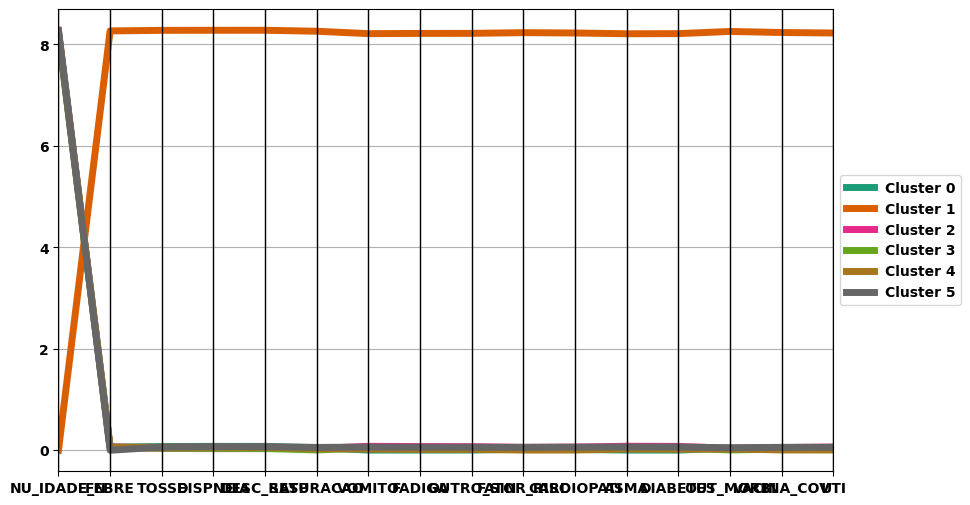

In [46]:
#plot
centroides['cluster'] = ['Cluster {}'.format(i) for i in centroides.index]
#
plt.figure(figsize=(10,6))
parallel_coordinates(centroides, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [47]:
ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
data = movies.drop('user',axis=1)
data.head()

,Jaws,Star Wars,Exorcist,Omen
0,5,5,2,1
1,4,5,3,2
2,4,4,4,3
3,2,2,4,5
4,1,2,3,4


Text(0, 0.5, 'SSE')

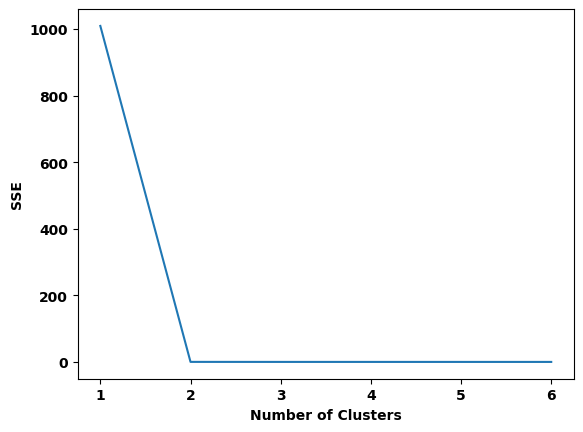

In [55]:
#import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn import cluster

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(dx_norm)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE');

---
<center><b>© Jorge Zavaleta, 2024</b></center>